In [9]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)
logging.warning('is when this event was logged.')

2025-04-23 14:40:15,370 is when this event was logged.


This notebook demonstrates using matplotlib's PolyCollection method to visualize native datasets read in with uxarray. It follows the uxarray user guide: https://uxarray.readthedocs.io/en/latest/user-guide/mpl.html with consideration of the discussion from E3SM documentation: https://acme-climate.atlassian.net/wiki/spaces/DOC/pages/1210023949/Plotting+data+on+SE+native+grid

In [10]:
base_path = "/lcrc/group/e3sm/public_html/"
grid_info = "ne120pg2"
grid_path = base_path + f"diagnostics/grids/{grid_info}.nc"
data_path = base_path + f"e3sm_diags_test_data/native_grid/PRECC.{grid_info}.nc"

base_path = "/Users/zhang40/Documents/ACME_simulations/E3SM_v2/native_grid_data/"
grid_info = "ne120pg2"
grid_path = base_path + f"{grid_info}.nc"
data_path = base_path + f"PRECC.{grid_info}.nc"

logging.info("open datasets with uxarray")
uxds = ux.open_dataset(grid_path, data_path)

2025-04-23 14:40:19,161 open datasets with uxarray


In [11]:
logging.info("convert a UxDataArray containing a face-centered data variable into a matplotlib.collections.PolyCollection instance")
pc = uxds["PRECC"].squeeze().to_polycollection()
#pc = uxds["PRECC"].squeeze().to_polycollection(periodic_elements="split") # option to treat data cross date-time/antimeridian, which will results in 20x performance hit


2025-04-23 14:40:19,937 convert a UxDataArray containing a face-centered data variable into a matplotlib.collections.PolyCollection instance


2025-04-23 14:40:23,993 start creating plot


Text(0.5, 1.0, 'PolyCollection Plot with Projection & Features')

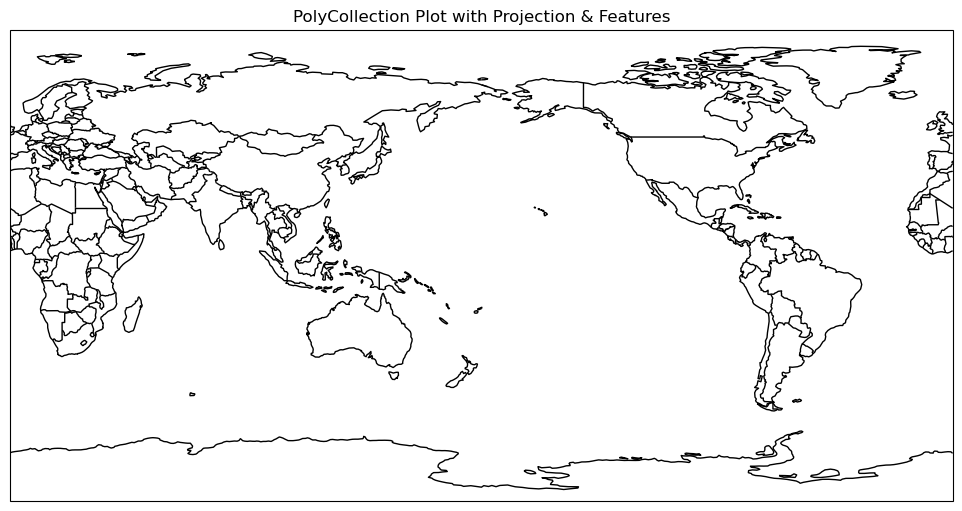

In [12]:
# disables grid lines
pc.set_antialiased(False)

pc.set_cmap("plasma")

logging.info("start creating plot")
fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 5),
    facecolor="w",
    constrained_layout=True,
    subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)),
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.add_collection(pc)
ax.set_global()
plt.title("PolyCollection Plot with Projection & Features")
#logging.info("save plot in png format")
#plt.savefig(f'/lcrc/group/e3sm/public_html/diagnostic_output/ac.zhang40/tests/PRECC_{grid_info}.png')

In [13]:
pc.get_fc()

array([[0.12156863, 0.46666667, 0.70588235, 1.        ]])

In [14]:
# remapping from ne120 to ne30
grid_info = "ne30pg2"
grid_path = base_path + f"{grid_info}.nc"
data_path = base_path + f"PRECC.{grid_info}.nc"
uxds_ne30 = ux.open_dataset(grid_path, data_path)

In [15]:
remapped = uxds["PRECC"].squeeze().remap.nearest_neighbor(uxds_ne30.uxgrid, remap_to="face centers")

In [22]:
pc_r = (uxds_ne30["PRECC"].squeeze() - remapped).to_polycollection()

In [24]:
uxds_diff = ux.open_dataset(grid_path, "/Users/zhang40/Documents/repos/e3sm_diags/diff")


In [25]:
pc_r = uxds_diff["PRECC"].squeeze().to_polycollection()

2025-04-23 15:24:46,567 start creating plot


Text(0.5, 1.0, 'PolyCollection Plot with Projection & Features')

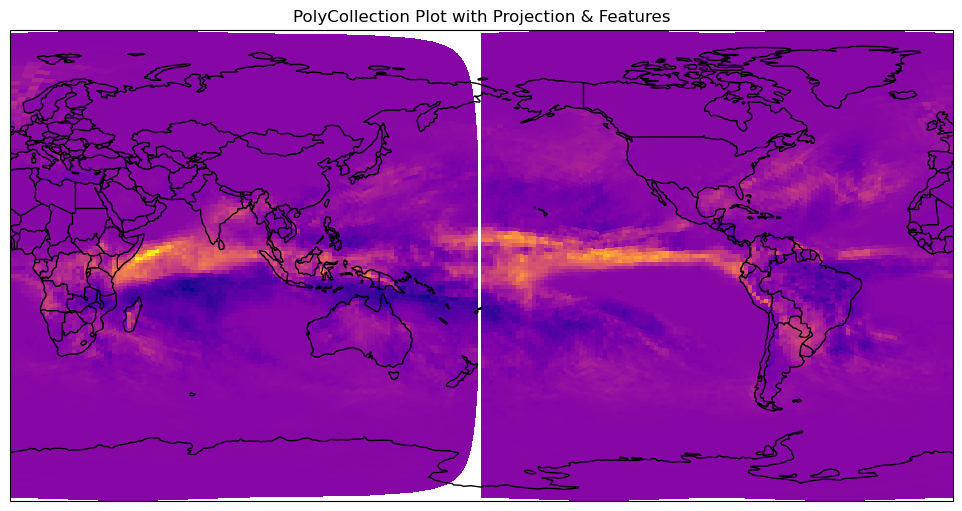

In [26]:
# disables grid lines
pc_r.set_antialiased(False)

pc_r.set_cmap("plasma")

logging.info("start creating plot")
fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 5),
    facecolor="w",
    constrained_layout=True,
    subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)),
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.add_collection(pc_r)
ax.set_global()
plt.title("PolyCollection Plot with Projection & Features")

In [21]:
print(remapped )

<xarray.UxDataArray 'PRECC' (n_face: 21600)> Size: 86kB
array([4.8524551e-08, 3.2724763e-08, 6.5138693e-08, ..., 9.9643827e-10,
       4.2643347e-09, 9.1901931e-10], shape=(21600,), dtype=float32)
Coordinates:
    time     object 8B 0001-02-01 00:00:00
Dimensions without coordinates: n_face
